# Icing: An Observational Study 🥶

Hypothesis: Icing a kicker prior to an attempty reduces the likelihood of conversion.

## Load & Clean

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import mysql.connector
import itertools
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from util.data import clean, get_data

In [2]:
cnx = mysql.connector.connect(user='root', password='mOntie20!mysql', host='127.0.0.1', database='nfl')
df = get_data(cnx, 'g.seas<=2019', xp=False, base='raw_6_cat')
df = clean(df, dropna=False)
df

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
2166,AD-0800,1,38,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.764708,765
2185,AD-0800,1,27,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.807721,766
4565,AD-0800,1,36,2000,17,80,TEN,Adelphia Coliseum,TEN,0,...,1,13,0,0,1,0,0,5,NaN,767
8564,AD-0800,1,24,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.842837,768
8628,AD-0800,1,40,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.871516,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862982,ZG-0050,1,30,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,0,0,0,0,0,0,1,0.826709,62
865338,ZG-0050,1,21,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,11,0,0,0,0,0,2,0.858217,63
868268,ZG-0050,1,22,2019,3,43,SEA,CenturyLink Field,ARI,0,...,1,7,1,0,0,1,0,1,1.000000,64


In [3]:
df.describe()

,good,dist,year,seasons,temperature,XP,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
count,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.0,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18710.000000,18803.000000
mean,0.844865,36.881242,2009.516992,7.913099,60.776153,0.0,29.927139,0.033771,0.352178,6.549593,0.487901,0.040845,0.125033,0.445408,0.080413,1.400202,0.844876,255.230601
std,0.362043,10.070235,5.643918,5.162924,15.706069,0.0,5.250091,0.180645,0.477662,5.986469,0.499867,0.197935,0.330765,0.497024,0.271938,1.024004,0.124109,209.053136
min,0.000000,18.000000,2000.000000,1.000000,-6.000000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,2005.000000,4.000000,51.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.772214,94.000000
50%,1.000000,37.000000,2010.000000,7.000000,64.000000,0.0,29.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.865337,201.000000
75%,1.000000,45.000000,2014.000000,11.000000,70.000000,0.0,33.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.945632,362.000000
max,1.000000,76.000000,2019.000000,26.000000,109.000000,0.0,47.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1033.000000


## Explore

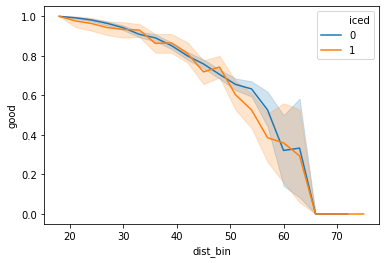

In [4]:
df_ = df.copy()
df_['dist_bin'] = 3*round(df_['dist']/3)
sns.lineplot(x='dist_bin', y='good', hue='iced', data=df_)

## Pair

In [5]:
df_iced = df[(df['iced']==1) & (df['dist']>=45)]
df_iced.dropna(inplace=True)
df_iced

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
11064,AD-0800,0,46,2000,17,72,TEN,Adelphia Coliseum,TEN,0,...,1,5,0,0,1,0,0,1,1.000000,771
32219,AD-0800,1,50,2000,17,30,PHI,Veterans Stadium,TEN,0,...,0,7,1,0,1,1,0,6,0.961555,795
565517,AH-2600,1,48,2013,3,80,WAS,FedEx Field,PHI,0,...,0,9,1,0,1,0,0,1,0.967172,58
566452,AH-2600,0,46,2013,3,71,PHI,Lincoln Financial Field,PHI,0,...,0,6,0,0,1,0,0,1,0.998184,60
603365,AH-2600,1,49,2013,3,62,PHI,Lincoln Financial Field,PHI,0,...,1,11,0,0,1,0,0,1,0.782129,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55314,WR-0500,1,51,2001,4,66,SD,Qualcomm Stadium,SD\r,0,...,1,8,0,0,1,0,0,1,0.768539,173
169854,WR-0500,0,51,2003,6,42,BAL,M&T Bank Stadium,BAL,0,...,1,5,0,0,1,1,0,5,0.573253,189
776554,ZG-0050,1,45,2017,1,36,CLE,FirstEnergy Stadium,CLE,0,...,1,0,0,0,1,0,0,1,0.727779,17


In [6]:
def get_mask(data, row, ddist=3, dwind=5, dtemp=5, dyear=1, dpres=0, dkicks=100, dseas=2, dage=2):
    mask = (data['iced']!=row['iced']) &\
           (abs(data['kicks']-row['kicks'])<=dkicks) &\
           (abs(data['seasons']-row['seasons'])<=dseas) &\
           (abs(data['age']-row['age'])<=dseas) &\
           (abs(data['dist']-row['dist'])<=ddist) &\
           (abs(data['wind']-row['wind'])<=dwind) &\
           (abs(data['temperature']-row['temperature'])<=dtemp) &\
           (abs(data['year']-row['year'])<=dyear) &\
           (data['postseason']==row['postseason']) &\
           (data['turf']==row['turf']) &\
           (data['altitude']==row['altitude']) &\
           (data['away_game']==row['away_game']) &\
           (data['precipitation']==row['precipitation']) &\
           (abs(data['pressure']-row['pressure'])<=dpres)
    return mask

def get_diff(df, row):
    for i in row.index:
        if not isinstance(row[i],str):
            df[i+'_d'] = df[i].sub(row[i]).abs()
    return df

In [7]:
noice = {}
for index, row in df_iced.iterrows():
    mask = get_mask(df, row)
    df_choices = get_diff(df[mask],row).sort_values(['dist_d','year_d','kicks_d','wind_d','temperature_d','seasons_d','age_d'])
    for i, choice in df_choices.iterrows():
        if i not in noice:
            choice['match_pid'] = index
            noice[i] = choice
            break
print(len(df_iced)-len(noice), 'are missing matches.')
df_noice = pd.DataFrame.from_dict(noice, orient='index').sort_values(['dist_d','year_d','seasons_d'])
df_noice

471 are missing matches.


,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,wind_d,away_game_d,postseason_d,iced_d,turf_d,precipitation_d,pressure_d,form_d,kicks_d,match_pid
470709,AV-0400,1,48,2010,15,41,IND,Lucas Oil Stadium,IND,0,...,0,0,0,1,0,0,0,0.030740,13,449909
630292,AV-0400,1,48,2014,19,55,NYG,MetLife Stadium,IND,0,...,0,0,0,1,0,0,0,0.010570,2,630367
680323,BW-0350,0,51,2015,4,70,ATL,Georgia Dome,MIN,0,...,0,0,0,1,0,0,0,0.139062,12,668731
507347,DC-0500,0,55,2011,4,75,MIA,Sun Life Stadium,MIA,0,...,2,0,0,1,0,0,0,0.019136,40,497475
750317,CC-1150,0,45,2017,4,64,NYJ,MetLife Stadium,NYJ,0,...,0,0,0,1,0,0,0,0.027866,1,750305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675132,DB-0200,1,53,2015,5,79,TB,Raymond James Stadium,DAL,0,...,5,0,0,1,0,0,0,0.169233,59,729483
494319,NF-0300,1,49,2011,5,57,BUF,Ralph Wilson Stadium,NYJ,0,...,1,0,0,1,0,0,0,0.113984,78,431017
600552,DB-0200,1,50,2013,3,70,DAL,AT&T Stadium,DAL,0,...,0,0,0,1,0,0,0,0.163343,13,559927
572102,BC-3000,1,51,2013,12,68,CLE,FirstEnergy Stadium,CLE,0,...,4,0,0,1,0,0,0,0.430692,66,634366


In [8]:
missing = df_iced.drop(index=df_noice['match_pid'])
missing

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
32219,AD-0800,1,50,2000,17,30,PHI,Veterans Stadium,TEN,0,...,0,7,1,0,1,1,0,6,0.961555,795
618654,AH-2600,0,50,2014,4,83,DET,Ford Field,DET,0,...,0,0,0,0,1,1,0,5,0.635073,92
21903,AV-0400,1,48,2000,5,46,NE,Foxboro Stadium,NE\r,0,...,1,20,0,0,1,0,1,1,0.742034,240
149261,AV-0400,1,46,2003,8,35,DEN,Invesco Field at Mile High,NE\r,0,...,0,0,1,0,1,0,0,1,0.868980,343
209731,AV-0400,0,50,2004,9,30,NYJ,The Meadowlands,NE\r,0,...,1,10,1,0,1,1,0,1,0.934811,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831758,WL-0300,1,58,2019,4,70,NO,Mercedes-Benz Superdome,NO\r,0,...,0,0,0,0,1,1,0,6,0.787539,109
871945,WL-0300,1,49,2019,4,70,NO,Mercedes-Benz Superdome,NO\r,0,...,0,0,0,1,1,1,0,6,0.797127,144
169854,WR-0500,0,51,2003,6,42,BAL,M&T Bank Stadium,BAL,0,...,1,5,0,0,1,1,0,5,0.573253,189


In [9]:
df_iced = df_iced.loc[df_noice['match_pid'],:]
df_iced

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
449909,AV-0400,1,48,2010,15,43,IND,Lucas Oil Stadium,IND,0,...,0,0,0,0,1,1,0,1,0.961536,550
630367,AV-0400,1,48,2014,19,55,NYG,MetLife Stadium,IND,0,...,0,6,1,0,1,1,0,1,0.978595,690
668731,BW-0350,1,51,2015,4,70,DET,Ford Field,MIN,0,...,0,0,1,0,1,1,0,1,0.692564,114
497475,CB-0700,1,55,2011,4,77,TB,Raymond James Stadium,TB\r,0,...,0,9,0,0,1,0,0,1,0.817916,75
750305,CC-1150,1,45,2017,4,64,NYJ,MetLife Stadium,NYJ,0,...,0,5,0,0,1,1,0,1,0.846740,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729483,CC-1150,1,56,2016,3,77,MIA,Sun Life Stadium,ARI,0,...,1,18,1,0,1,0,0,1,0.644495,85
431017,DC-0500,0,46,2010,3,62,BUF,Ralph Wilson Stadium,MIA,0,...,1,7,1,0,1,1,0,1,0.963826,54
559927,GH-0600,1,53,2012,5,75,NO,Mercedes-Benz Superdome,NO\r,0,...,0,0,0,0,1,1,0,1,0.804869,78


## Model

We work within a Bayesian framework, setting a prior distribution on the true population proportion and update the prior after our observations. The Beta-Binomial conjugacy makes this process relatively pain-free.

In [10]:
from scipy.stats import beta
p_hat = df[df['dist']>=40]['good'].mean()
alpha_ = 12
beta_ = int(round(alpha_*(1-p_hat)/p_hat))
print(f'alpha: {alpha_}, beta: {beta_}')

alpha: 12, beta: 5


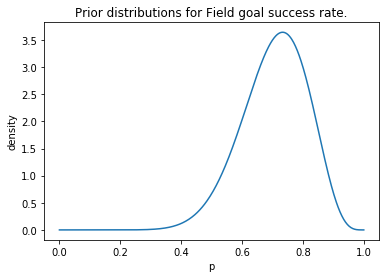

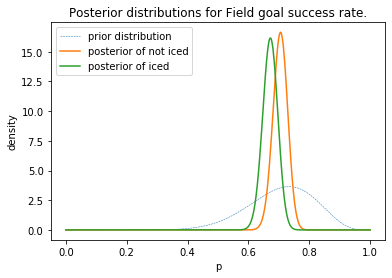

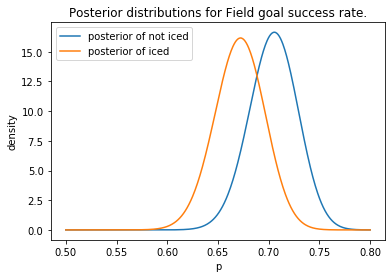

In [17]:
from util.bayes import BetaBinomial

control = BetaBinomial(alpha_, beta_, 'not iced')
treatment = BetaBinomial(alpha_, beta_, 'iced')
control.plot_prior(show=True)
plt.cla()

control.observe(df_noice['good'])
treatment.observe(df_iced['good'])

control.plot_posterior(prior=True)
treatment.plot_posterior(show=True, prior=False)

# zoom in
x = np.linspace(0.5,0.8,500)
control.plot_posterior(x, prior=False, show=False)
treatment.plot_posterior(x, prior=False, show=True)

samples = 20000
samples_posterior_noice = control.sample(samples)
samples_posterior_ice = treatment.sample(samples)

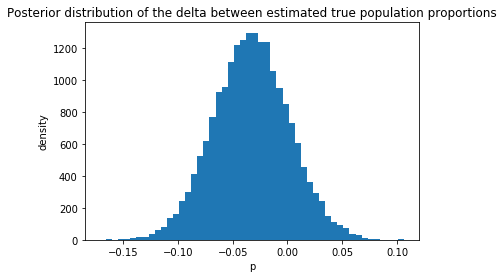

83 % likely that iced has a lower true population proportion of converted field goals.
-0.03 is the median difference, with 50% credible interval of (0.0,-0.07).


In [16]:
posterior_diff = samples_posterior_ice - samples_posterior_noice

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions')
plt.show()
print(int((samples_posterior_ice<samples_posterior_noice).mean()*100), r'% likely that iced has a lower true population proportion of converted field goals.')

from scipy.stats import bayes_mvs
alpha = 0.5
center, _, _ = bayes_mvs(posterior_diff, alpha=alpha)
print(f'{round(center.statistic,2)} is the median difference, with {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

77 % likely relative lift less than -1%.
-0.05 is the median relative lift, with 50 credible interval of (0.0,-0.09).


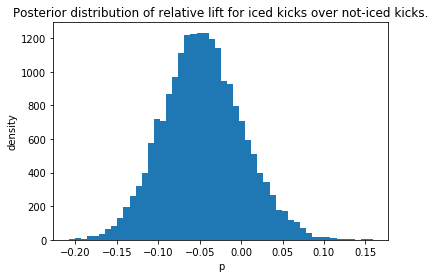

In [13]:
posterior_relative = (samples_posterior_ice-samples_posterior_noice)/samples_posterior_noice
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for iced kicks over not-iced kicks.')
print(int((posterior_relative<-0.01).mean()*100), r'% likely relative lift less than -1%.')

center, _, _ = bayes_mvs(posterior_relative, alpha=alpha)
print(f'{round(center.statistic,2)} is the median relative lift, with {int(alpha*100)} credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

## Conclusions

* We are 83% sure icing has a negative effect on kickers.
* The median true proportion difference was -0.03 (2% points lower) with a 50% credible interval of -0.07 to 0.
* The median of relative change is -5% with a 50% CI between -9% and 0%.
* Overall, the effect is said to be weakly negative.
* With this is mind, is icing a kicker worth the cost of a timeout? Football might be a game of inches (or rather, yards), but the relatively minor effect of icing (whether it actually be positive or negative), I'd argue, is not worth the timeout.